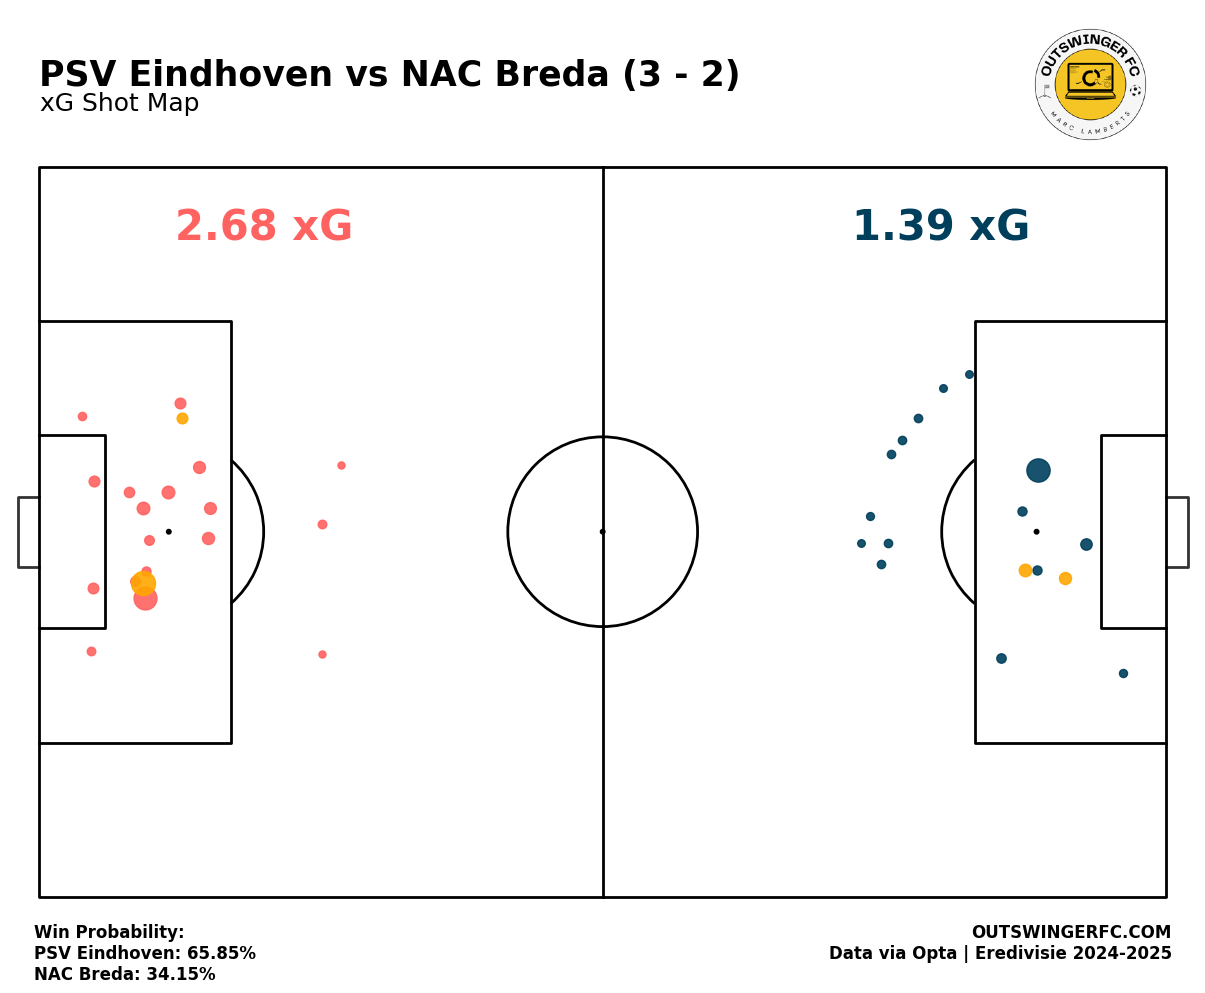

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from matplotlib.patches import Circle
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Load the data (adjust the file path accordingly)
file_path = '/Users/marclambertes/Python/Eredivisie 2024-2025/xgCSV/2025-01-25_PSV Eindhoven - NAC Breda.csv'
df = pd.read_csv(file_path)

# Extract team names from the file name
file_name = file_path.split('/')[-1]  # Extract the file name
teams = file_name.split('_')[-1].split(' - ')  # Extract team names from the file name

# Define the home and away teams
team1_name = teams[0]
team2_name = teams[1].split('.')[0]

# Count goals for each team
team1_goals = df.loc[(df['TeamId'] == team1_name) & (df['isGoal'] == True), 'isGoal'].sum()
team2_goals = df.loc[(df['TeamId'] == team2_name) & (df['isGoal'] == True), 'isGoal'].sum()

team1 = df.loc[df['TeamId'] == team1_name].reset_index()
team2 = df.loc[df['TeamId'] == team2_name].reset_index()

# Calculate total xG and PsxG for each team
team1_xg = team1['xG'].sum()
team2_xg = team2['xG'].sum()
team1_psxg = team1['PsxG'].sum() if 'PsxG' in team1.columns else 0
team2_psxg = team2['PsxG'].sum() if 'PsxG' in team2.columns else 0

# Calculate Win Probabilities and Expected Points for each team
total_xg = team1_xg + team2_xg
team1_win_prob = team1_xg / total_xg
team2_win_prob = team2_xg / total_xg
draw_prob = 1 - (team1_win_prob + team2_win_prob)

# Expected Points Calculation
team1_xp = (3 * team1_win_prob) + (1 * draw_prob)
team2_xp = (3 * team2_win_prob) + (1 * draw_prob)

# Plot the pitch
pitch = Pitch(pitch_type='opta', pitch_width=68, pitch_length=105, pad_bottom=0.5, pad_top=5, pitch_color='white',
              line_color='black', half=False, goal_type='box', goal_alpha=0.8)
fig, ax = plt.subplots(figsize=(16, 10))
pitch.draw(ax=ax)
fig.set_facecolor('white')  # Set background to white
plt.gca().invert_xaxis()

# Scatter plot code for team1 (home team)
for x in range(len(team1['x'])):
    if team1['Type_of_play'][x] == 'FromCorner' and team1['isGoal'][x] == True:
        plt.scatter(team1['x'][x], 100 - team1['y'][x], color='#ffa600', s=team1['xG'][x] * 800, alpha=0.9, zorder=3)
    elif team1['Type_of_play'][x] == 'FromCorner' and team1['isGoal'][x] == False:
        plt.scatter(team1['x'][x], team1['y'][x], color='#ff6361', s=team1['xG'][x] * 800, alpha=0.9, zorder=2)
    elif team1['Type_of_play'][x] == 'RegularPlay' and team1['isGoal'][x] == True:
        plt.scatter(team1['x'][x], 100 - team1['y'][x], color='#ffa600', s=team1['xG'][x] * 800, alpha=0.9, zorder=3)
    elif team1['Type_of_play'][x] == 'RegularPlay' and team1['isGoal'][x] == False:
        plt.scatter(team1['x'][x], 100 - team1['y'][x], color='#ff6361', s=team1['xG'][x] * 800, alpha=0.9, zorder=2)

# Scatter plot code for team2 (away team)
for x in range(len(team2['x'])):
    if team2['Type_of_play'][x] == 'FromCorner' and team2['isGoal'][x] == True:
        plt.scatter(100 - team2['x'][x], team2['y'][x], color='#ffa600', s=team2['xG'][x] * 800, alpha=0.9, zorder=3)
    elif team2['Type_of_play'][x] == 'FromCorner' and team2['isGoal'][x] == False:
        plt.scatter(100 - team2['x'][x], team2['y'][x], color='#003f5c', s=team2['xG'][x] * 800, alpha=0.9, zorder=2)
    elif team2['Type_of_play'][x] == 'RegularPlay' and team2['isGoal'][x] == True:
        plt.scatter(100 - team2['x'][x], team2['y'][x], color='#ffa600', s=team2['xG'][x] * 800, alpha=0.9, zorder=3)
    elif team2['Type_of_play'][x] == 'RegularPlay' and team2['isGoal'][x] == False:
        plt.scatter(100 - team2['x'][x], team2['y'][x], color='#003f5c', s=team2['xG'][x] * 800, alpha=0.9, zorder=2)


# Display xG for each team in the title
plt.text(80, 90, f"{team1_xg:.2f} xG", color='#ff6361', ha='center', fontsize=30, fontweight='bold')
plt.text(20, 90, f"{team2_xg:.2f} xG", color='#003f5c', ha='center', fontsize=30, fontweight='bold')

# Create the title with goals and expected points included
title = f"{team1_name} vs {team2_name} ({team1_goals} - {team2_goals})"
subtitle = f"xG Shot Map"

# Title text
plt.text(0.32, 1.05, title, ha='center', va='bottom', fontsize=25, fontweight='bold', transform=ax.transAxes)
plt.text(0.16, 1.02, subtitle, ha='right', va='bottom', fontsize=18, transform=ax.transAxes)


# Add logo in the top-right corner
logo_path = 'Outswinger FC (3).png'  # Replace with the path to your logo file
logo_img = mpimg.imread(logo_path)  # Read the logo image

# Create the logo image and place it at the top-right corner of the plot
imagebox = OffsetImage(logo_img, zoom=0.5)  # Adjust zoom for scaling the logo
ab = AnnotationBbox(imagebox, (0.97, 1.15), frameon=False, xycoords='axes fraction', box_alignment=(1, 1))

# Add the logo to the plot
ax.add_artist(ab)

# Add text in the bottom-right corner
text = "OUTSWINGERFC.COM\nData via Opta | Eredivisie 2024-2025"
plt.text(0.98, -0.03, text, ha='right', va='top', fontsize=12, color='black', weight='bold', transform=ax.transAxes)


# Add win probability text at the bottom-left
win_text = f"Win Probability:\n{team1_name}: {team1_win_prob*100:.2f}%\n{team2_name}: {team2_win_prob*100:.2f}%"
plt.text(0.02, -0.03, win_text, ha='left', va='top', fontsize=12, color='black', weight='bold', transform=ax.transAxes)


# Save and show the plot
plt.savefig('Shotmap_with_metrics_and_expected_points.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
